In [23]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.manifold import TSNE
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Сбор текстов новостей

In [ ]:
all_pages_Endangered_species = []
all_pages_Greenhouse = []
all_pages_Waste = []
all_pages_Fossil_fuels = []
all_pages_Farming = []
all_pages_Renewable_energy = []


for i in range(1,135):
    all_pages_Endangered_species.append('https://www.theguardian.com/environment/endangeredspecies?page=' + str(i))
for i in range(1,170):
    all_pages_Greenhouse.append('https://www.theguardian.com/environment/carbon-emissions?page=' + str(i))
for i in range(1,340):
    all_pages_Waste.append('https://www.theguardian.com/environment/waste?page=' + str(i))
for i in range(1,235):
    all_pages_Fossil_fuels.append('https://www.theguardian.com/environment/fossil-fuels?page=' + str(i))
for i in range(1,210):
    all_pages_Farming.append('https://www.theguardian.com/environment/farming?page=' + str(i))
for i in range(1,225):
    all_pages_Renewable_energy.append('https://www.theguardian.com/environment/renewableenergy?page=' + str(i))     

In [ ]:
all_links = []

def GetLinks(all_pages):
    links_topic = []
    for page in all_pages:
        link = rq.get(page)
        soup = BeautifulSoup(link.text, features="html.parser") 
        for a in soup.find_all("a", class_="dcr-lv2v9o"):
            if '/environment/' in a.get('href'):
                if 'video' not in a.get('href') and 'audio' not in a.get('href') and 'gallery' not in a.get('href') and 'commentisfree' not in a.get('href') and 'ng-interactive' not in a.get('href'):
                    if ('https://www.theguardian.com' + a.get('href')) not in all_links:
                        links_topic.append('https://www.theguardian.com' + a.get('href'))
                        all_links.append('https://www.theguardian.com' + a.get('href'))
                        
    return links_topic

In [ ]:
links_Endangered_species = GetLinks(all_pages_Endangered_species)
links_Greenhouse = GetLinks(all_pages_Greenhouse)
links_Waste = GetLinks(all_pages_Waste)
links_Fossil_fuels = GetLinks(all_pages_Fossil_fuels)
links_Farming = GetLinks(all_pages_Farming)
links_Renewable_energy = GetLinks(all_pages_Renewable_energy)

In [ ]:
def GetNews(url):
    
    page = rq.get(url)
    soup = BeautifulSoup(page.text, features="html.parser")
    
    tags = [] 
    for i in soup.find_all('a', class_= 'dcr-1gwziyt'):
        tags.append(i.text)
    tags = ', '.join(tags) 
    
    title = soup.find('h1').text
    
    text = ''
    if soup.find_all('p', class_='dcr-iy9ec7'):
        text = [i.text for i in soup.find_all('p', class_='dcr-iy9ec7')]  
    if soup.find_all('p', class_= 'dcr-1dd4wv0'):
        text = [i.text for i in soup.find_all('p', class_= 'dcr-1dd4wv0')]
    if soup.find_all('p', class_= 'dcr-1bgz3hb'):
        text = [i.text for i in soup.find_all('p', class_= 'dcr-1bgz3hb')]
    final_text = ' '.join(text)
    final_text = final_text.replace('\xa0', ' ').replace('\n', '').strip()
    
    return url, tags, title, final_text

In [ ]:
def get_news_data(links_list):
    news_data = []
    for link in tqdm(links_list):
        try:
            new = GetNews(link)
            news_data.append(new)

            if new[-1] == "":
                raise Exception("Text is empty!!!")
        except Exception as err:
            print(f"Failed: {link} , err: {err}")
    return news_data

In [ ]:
Endangered_species_data = get_news_data(links_Endangered_species)
Greenhouse_data = get_news_data(links_Greenhouse)
Waste_data = get_news_data(links_Waste)
Fossil_fuels_data = get_news_data(links_Fossil_fuels)
Farming_data = get_news_data(links_Farming)
Renewable_energy_data = get_news_data(links_Renewable_energy)

In [ ]:
df_Endangered_species = pd.DataFrame(Endangered_species_data, columns=['link', 'tags', 'title', 'text'])
df_Greenhouse = pd.DataFrame(Greenhouse_data, columns=['link', 'tags', 'title', 'text'])
df_Waste = pd.DataFrame(Waste_data, columns=['link', 'tags', 'title', 'text'])
df_Fossil_fuels = pd.DataFrame(Fossil_fuels_data, columns=['link', 'tags', 'title', 'text'])
df_Farming = pd.DataFrame(Farming_data, columns=['link', 'tags', 'title', 'text'])
df_Renewable_energy = pd.DataFrame(Renewable_energy_data, columns=['link', 'tags', 'title', 'text'])

In [ ]:
df_Endangered_species['category'] = 'Endangered_species'
df_Greenhouse['category'] = 'Greenhouse'
df_Waste['category'] = 'Waste'
df_Fossil_fuels['category'] = 'Fossil_fuels'
df_Farming['category'] = 'Farming'
df_Renewable_energy['category'] = 'Renewable_energy'

In [ ]:
df_environment = pd.concat([df_Endangered_species, df_Greenhouse, df_Waste, df_Fossil_fuels, df_Farming, df_Renewable_energy], ignore_index=True)

In [ ]:
no_duplicates = df_environment.drop_duplicates(subset='text', keep=False, ignore_index=True)

In [ ]:
df_original = no_duplicates

In [18]:
df_original

,link,tags,title,text,category
0,https://www.theguardian.com/environment/articl...,"Sharks, The age of extinction, Marine life, Wi...",‘They’re not like puppy dogs. They should be r...,We have only been waiting in the grey Atlantic...,Endangered_species
1,https://www.theguardian.com/environment/articl...,"The age of extinction, Endangered species, Nor...","Eagle attacks, red invaders and a genetic bott...","Deep in the Norwegian mountains, amid a vast e...",Endangered_species
2,https://www.theguardian.com/environment/articl...,"Trees and forests, The age of extinction, Inse...",The end of the great northern forests? The tin...,The giant sequoia is so enormous that it was o...,Endangered_species
3,https://www.theguardian.com/environment/articl...,"Marine life, Conservation, Wales, Endangered h...","Green, green seagrass of home: Welsh nursery g...",It is a much-loved stretch of Celtic coastline...,Endangered_species
4,https://www.theguardian.com/environment/articl...,"Chester, Birds, Endangered species, Animals, E...",Endangered penguin chicks hatched at Chester z...,In previous years Chester zoo’s new penguin ch...,Endangered_species
...,...,...,...,...,...
9787,https://www.theguardian.com/environment/2012/o...,"Energy, Smart meters, Energy efficiency, Renew...",Can the Isle of Wight start a power revolution?,Energy minister John Hayes gets on the interne...,Renewable_energy
9788,https://www.theguardian.com/environment/2012/o...,"Energy, Energy bills, Household bills, Energy ...",Cameron fuels new energy debate,While David Cameron attempts to legislate a so...,Renewable_energy
9789,https://www.theguardian.com/environment/2012/o...,"Renewable energy, Fossil fuels, Energy, Oil (E...",Saudi Arabia reveals plans to be powered entir...,"Saudi Arabia, the world's biggest oil producer...",Renewable_energy
9790,https://www.theguardian.com/environment/2012/o...,"Energy, Renewable energy, Gas, Fossil fuels, C...",Coalition's energy policy is even more confuse...,David Cameron's announcement yesterday that th...,Renewable_energy


In [19]:
df_original.groupby(by='category').size()

category
Endangered_species    1627
Farming               1642
Fossil_fuels          1657
Greenhouse            1612
Renewable_energy      1638
Waste                 1616
dtype: int64

In [4]:
df_original.to_csv("project_2_data.csv", sep = '\t')

# Предобработка текстов
### Лемматизация и удаления пунктуации

In [ ]:
X = df_original.text.values.tolist()
y = df_original.category.values.tolist()

In [ ]:
for text in X:
    text = text.replace("Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup", "")

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
texts_prep = []
for text in tqdm(X):
    text = text.lower()
    doc = nlp(text)
    words_lemmas = ' '.join([token.lemma_ for token in doc if token.lemma_.isalpha()])
    texts_prep.append(words_lemmas)

In [9]:
pd.DataFrame(zip(texts_prep, y), columns=["text", "category"]).to_csv("preprocessed_text_2.csv", index=False)

In [10]:
df = pd.read_csv("preprocessed_text_2.csv")
df.rename(columns={"text": "preprocessed_text"}, inplace=True)

In [11]:
df_original = df_original[["title", "text"]].copy()

df_new = pd.concat([df_original, df], axis=1)
df_new.dropna(axis=0, inplace=True, ignore_index=True)
df_new.to_csv("cleaned_and_preprocessed_text.csv", index=False)

In [24]:
df = pd.read_csv("cleaned_and_preprocessed_text.csv")
df

,title,text,preprocessed_text,category
0,‘They’re not like puppy dogs. They should be r...,We have only been waiting in the grey Atlantic...,we have only be wait in the grey atlantic swel...,Endangered_species
1,"Eagle attacks, red invaders and a genetic bott...","Deep in the Norwegian mountains, amid a vast e...",deep in the norwegian mountain amid a vast exp...,Endangered_species
2,The end of the great northern forests? The tin...,The giant sequoia is so enormous that it was o...,the giant sequoia be so enormous that it be on...,Endangered_species
3,"Green, green seagrass of home: Welsh nursery g...",It is a much-loved stretch of Celtic coastline...,it be a much love stretch of celtic coastline ...,Endangered_species
4,Endangered penguin chicks hatched at Chester z...,In previous years Chester zoo’s new penguin ch...,in previous year chester zoo new penguin chick...,Endangered_species
...,...,...,...,...
9785,Can the Isle of Wight start a power revolution?,Energy minister John Hayes gets on the interne...,energy minister john hayes get on the internet...,Renewable_energy
9786,Cameron fuels new energy debate,While David Cameron attempts to legislate a so...,while david cameron attempt to legislate a sol...,Renewable_energy
9787,Saudi Arabia reveals plans to be powered entir...,"Saudi Arabia, the world's biggest oil producer...",saudi arabia the world big oil producer have p...,Renewable_energy
9788,Coalition's energy policy is even more confuse...,David Cameron's announcement yesterday that th...,david cameron announcement yesterday that the ...,Renewable_energy


In [25]:
df.groupby(by='category').size()

category
Endangered_species    1625
Farming               1642
Fossil_fuels          1657
Greenhouse            1612
Renewable_energy      1638
Waste                 1616
dtype: int64

In [26]:
original_text = df.text.values.tolist()
texts_prep = df.preprocessed_text.values.tolist()
y = df.category.values.tolist()

# Обучение моделей

In [28]:
X_train, X_test, y_train, y_test = train_test_split(texts_prep, y, test_size=0.2, shuffle=True, random_state=14)

In [29]:
count_vect = CountVectorizer(max_df=0.7, min_df=5)
                                
count_vect.fit(X_train)
 
X_train_cvec = count_vect.transform(X_train)
X_test_cvec = count_vect.transform(X_test)

## Multinomial NB

In [14]:
nb = MultinomialNB()
nb.fit(X_train_cvec, y_train)
pred_nb = nb.predict(X_test_cvec)

In [15]:
print(classification_report(y_test, pred_nb))

                    precision    recall  f1-score   support

Endangered_species       0.91      0.94      0.93       329
           Farming       0.87      0.88      0.87       345
      Fossil_fuels       0.78      0.70      0.74       326
        Greenhouse       0.65      0.71      0.68       298
  Renewable_energy       0.79      0.81      0.80       334
             Waste       0.93      0.89      0.91       326

          accuracy                           0.82      1958
         macro avg       0.82      0.82      0.82      1958
      weighted avg       0.83      0.82      0.82      1958



## Random Forest Classifier

In [16]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_cvec, y_train)
y_pred_rf = rf_classifier.predict(X_test_cvec)

In [17]:
print(classification_report(y_test, y_pred_rf))

                    precision    recall  f1-score   support

Endangered_species       0.90      0.95      0.92       329
           Farming       0.87      0.89      0.88       345
      Fossil_fuels       0.79      0.70      0.74       326
        Greenhouse       0.70      0.72      0.71       298
  Renewable_energy       0.78      0.81      0.79       334
             Waste       0.94      0.90      0.92       326

          accuracy                           0.83      1958
         macro avg       0.83      0.83      0.83      1958
      weighted avg       0.83      0.83      0.83      1958



## KNeighbors Classifier

#### Результаты у KNeighbors Classifier лучше если использовать tf-idf

In [18]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_cvec)
X_train_tfidf = tfidf_transformer.transform(X_train_cvec)
X_test_tfidf = tfidf_transformer.transform(X_test_cvec)

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn.fit(X_train_tfidf, y_train)
knn_clf_preds = knn_clf.predict(X_test_tfidf)

In [20]:
print(classification_report(y_test, knn_clf_preds))

                    precision    recall  f1-score   support

Endangered_species       0.89      0.91      0.90       329
           Farming       0.85      0.83      0.84       345
      Fossil_fuels       0.73      0.75      0.74       326
        Greenhouse       0.65      0.74      0.69       298
  Renewable_energy       0.85      0.77      0.81       334
             Waste       0.91      0.86      0.89       326

          accuracy                           0.81      1958
         macro avg       0.81      0.81      0.81      1958
      weighted avg       0.82      0.81      0.81      1958



## Bagging Classifier

In [21]:
bagc = BaggingClassifier() 
bagc.fit(X_train_cvec, y_train)
bagc_preds = bagc.predict(X_test_cvec)

In [22]:
print(classification_report(y_test, bagc_preds))

                    precision    recall  f1-score   support

Endangered_species       0.83      0.92      0.87       329
           Farming       0.80      0.82      0.81       345
      Fossil_fuels       0.73      0.68      0.70       326
        Greenhouse       0.67      0.68      0.67       298
  Renewable_energy       0.80      0.75      0.77       334
             Waste       0.88      0.87      0.87       326

          accuracy                           0.79      1958
         macro avg       0.78      0.78      0.78      1958
      weighted avg       0.79      0.79      0.78      1958



## Gradient Boosting Classifier

In [30]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0, verbose=10, n_iter_no_change=10)
gbc.fit(X_train_cvec, y_train)
gbc_preds = gbc.predict(X_test_cvec)

      Iter       Train Loss   Remaining Time 
         1           1.5492            3.11m
         2           1.3809            3.06m
         3           1.2514            3.03m
         4           1.1495            3.00m
         5           1.0625            2.97m
         6           0.9918            2.94m
         7           0.9283            2.91m
         8           0.8754            2.87m
         9           0.8283            2.85m
        10           0.7875            2.82m
        11           0.7519            2.79m
        12           0.7195            2.75m
        13           0.6918            2.72m
        14           0.6653            2.69m
        15           0.6424            2.66m
        16           0.6210            2.63m
        17           0.6021            2.60m
        18           0.5853            2.56m
        19           0.5697            2.53m
        20           0.5543            2.50m
        21           0.5411            2.47m
        2

In [31]:
print(classification_report(y_test, gbc_preds))

                    precision    recall  f1-score   support

Endangered_species       0.93      0.92      0.92       329
           Farming       0.86      0.87      0.86       345
      Fossil_fuels       0.78      0.75      0.76       326
        Greenhouse       0.70      0.73      0.71       298
  Renewable_energy       0.82      0.83      0.83       334
             Waste       0.92      0.90      0.91       326

          accuracy                           0.83      1958
         macro avg       0.83      0.83      0.83      1958
      weighted avg       0.84      0.83      0.83      1958



##### Gradient Boosting Classifier показал лучший результат

In [28]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(y)

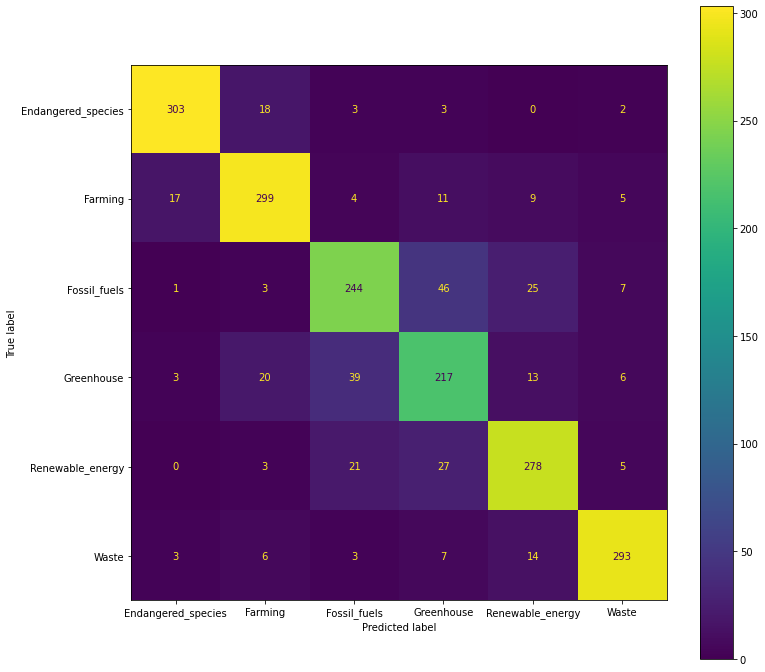

In [29]:
cm = confusion_matrix(y_test, gbc_preds)
cm_display = ConfusionMatrixDisplay(cm, display_labels=labelencoder.classes_)
fig, ax = plt.subplots(figsize=(12,12))
cm_display.plot(ax=ax)

In [34]:
y_pred = gbc_preds.tolist()

In [35]:
# Вывод текстов, которые были неправильно классифицированы

for i, (real, pred) in enumerate(zip(y_test, y_pred)):
    if real != pred:
        wrong_text = X_test[i]
        index = texts_prep.index(wrong_text)
        print(f"Real Category: {real}\nPredicted Category: {pred}\nText: {original_text[index]}")
        print("-"*40)

Real Category: Fossil_fuels
Predicted Category: Greenhouse
Text: Shell has become the latest large company to pull back from carbon offsets amid concerns many have no environmental impact, it has emerged, as the Carbon Trust discontinues its “carbon neutral” labelling scheme based on offsetting. The FTSE 100 oil company, one of the leading proponents of carbon offsetting, abandoned targets to invest up to $100m (£80m) a year in carbon credit schemes and purchase 120m nature offsets a year by 2030 in June, the oil major has confirmed. This is part of what critics argue is a broader watering down of Shell’s climate ambitions. The decision, first reported in Bloomberg, means Shell joins Gucci, Leon, Nestlé and other firms in moving away from offsets amid repeated indications that huge numbers of carbon credits do nothing to mitigate global heating. Earlier this year, the Guardian published an investigation that found that the vast numbers of rainforest carbon offsets were worthless. Shell

# Визуализация данных

In [30]:
tfidf_vec = TfidfVectorizer(max_df=0.7, min_df=5)
transformed_text = tfidf_vec.fit_transform(texts_prep)

In [31]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results = tsne.fit_transform(transformed_text.toarray())

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['category'] = df['category'] 

(-96.36778297424317, 88.97524299621583, -91.8383129119873, 84.6678035736084)

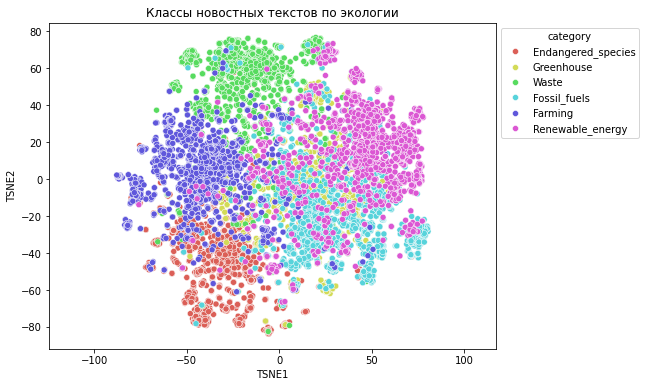

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='category', palette='hls')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Классы новостных текстов по экологии');
plt.axis('equal')